# Проект e-commerce

Продакт-менеджер попросил проанализировать совершенные покупки и ответить на следующие вопросы

In [1]:
# загружаем необходимые для начала библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
customers = pd.read_csv('C:/Users/Елизавета/уроки/ferst_project/olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

In [3]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [187]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [4]:
orders = pd.read_csv('C:/Users/Елизавета/уроки/ferst_project/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

In [5]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [6]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [7]:
items = pd.read_csv('C:/Users/Елизавета/уроки/ferst_project/olist_order_items_dataset.csv')
items 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [8]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

In [9]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Поскольку у покупок есть разные сатусы в данных, покупкой логично считать только те заказы, статус которых !=canceled, unavailable, и заколнена колонка order_approved_at, то есть подтверждение оплаты прошло. unavailable заказы будем считать условно "утерянными", т.к. нам не известны причины их недоступности, хотя approv у них есть и дата доставки есть, а остальное отсутвует и дальше с нимим никакие процессы не идут.

1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для этого нужно взять уникальные айдишники пользователей в customers и посомтреть сколько покупок приходится на каждый, отфильтровать с одной покупкой. Смерджим для этого два датафрейма.

In [10]:
# Для начала изменим тип данных дат
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [11]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
customers_orders = customers.merge(orders)
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [13]:
customers_orders.customer_unique_id.shape

(99441,)

Сначало отбирем заказы по условию "покупка" определенному выше, далее группируем по уникальным айдишникам пользователей, считаем количество заказов у каждого пользователя, для удобства переименуем колонку с количеством заказов, отбираем пользователей с одним заказом и выводим количество строк в получившемся ДФ.

In [14]:
customers_orders.query('order_approved_at != "NaT" and order_status != ["unavailable", "canceled"]') \
        .groupby('customer_unique_id', as_index=False) \
        .agg({'order_id':'count'}) \
        .rename(columns={'order_id':'ord_count'}) \
        .query('ord_count == 1') \
        .shape
# почти 93% пользователей совершили покупку только один раз

(92087, 2)

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

Заказы, которые в данный момент созданы, но еще не подтверждены, не оплачены, находятся в процессе сборки заказа или отгружены со склада, априори не могут быть доставленными, поэтому рассматривать их не вижу смылса, а больший интерес представляет по каким причинам и в каком количестве не произведена доставка тех товаров, которые не входят в эти группы.

Не доставлены заказы могут быть из-за отмены (canceled) , утери (unavailable) или заказ может чисится в системе как доставленный (delivered), но не зафиксированна дата доставки (order_delivered_customer_date), а это может быть вызвано как сбоем в системе регистрации времени доставки (курьер забыл внести данные и подтвердить), так и с тем, что заказ мог по ошибке попасть в раздел доставленных (но на самом деле не был вручен получателю по разным причинам).

In [15]:
# Найдем индексы заказов со статусом delivered, но без order_delivered_customer_date
orders.query('order_status == "delivered"').isna().query('order_delivered_customer_date == True').index

Int64Index([3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038], dtype='int64')

In [16]:
orders.query('index == [3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038]')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [17]:
undelivered_orders = orders.query('index == [3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038] or order_status == ["unavailable", "canceled"]')

In [18]:
undelivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
...,...,...,...,...,...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [20]:
# Добавим колонку с номером месяца в котором должна была быть доставка
undelivered_orders['month'] = undelivered_orders.order_estimated_delivery_date.dt.strftime('%Y-%m')

C:\Users\Елизавета\AppData\Local\Temp\ipykernel_16244\1707428378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undelivered_orders['month'] = undelivered_orders.order_estimated_delivery_date.dt.strftime('%Y-%m')


In [22]:
# Посчитаем среднее число недоставленных 
undelivered_orders.groupby('month') \
                    .agg({'order_id':'count'}) \
                    .mean()

order_id    47.769231
dtype: float64

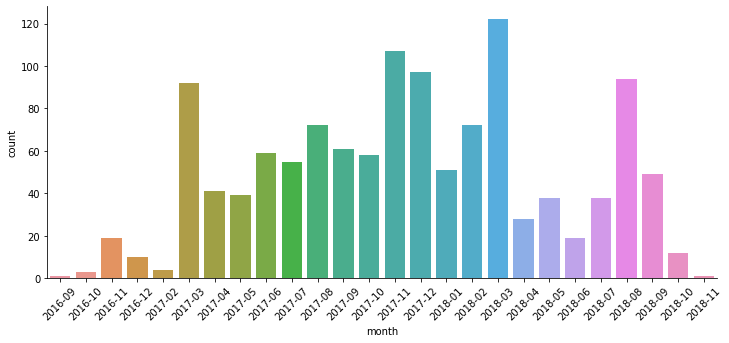

In [76]:
# Визуализируем результат по месяцам
plt.figure(figsize=(12, 5))
sns.countplot(undelivered_orders.month.sort_values())
plt.xticks(rotation=45)
sns.despine()
# Больше всего недоставленных по разным причинам заказов оказалось в марте

In [41]:
# Детализируем по причинам, хоть вклад неверно запоненных delivered очень мал
undelivered_orders.query('index == [3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038]').month.value_counts()

2018-07    5
2017-12    1
2017-06    1
2018-06    1
Name: month, dtype: int64

C:\Users\Елизавета\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

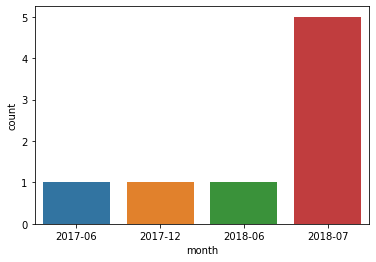

In [78]:
sns.countplot(undelivered_orders.query('index == [3002, 20618, 43834, 79263, 82868, 92643, 97647, 98038]').month.sort_values())

In [40]:
undelivered_orders.query('order_status == ["unavailable", "canceled"]').month.value_counts()

2018-03    122
2017-11    107
2017-12     96
2018-08     94
2017-03     92
2018-02     72
2017-08     72
2017-09     61
2017-06     58
2017-10     58
2017-07     55
2018-01     51
2018-09     49
2017-04     41
2017-05     39
2018-05     38
2018-07     33
2018-04     28
2016-11     19
2018-06     18
2018-10     12
2016-12     10
2017-02      4
2016-10      3
2016-09      1
2018-11      1
Name: month, dtype: int64

C:\Users\Елизавета\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

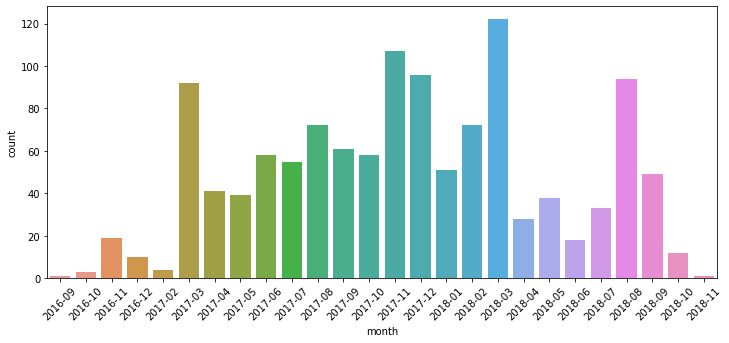

In [77]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)
sns.countplot(undelivered_orders.query('order_status == ["unavailable", "canceled"]').month.sort_values())

**Следует вывод, что, конечно, основной вклад дают *отмененные* и *недоступные* заказы**

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [46]:
# Посмотри на ДФ с товарами
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [49]:
# Проверим типы данных
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [50]:
# Преобразуем дату из object в datetime64 (не пригодится, возможно, но пусть будет)
items['shipping_limit_date'] = pd.to_datetime(items.shipping_limit_date)

Смерджим ДФ-мы с нужными нам датами покупок, которые указаны в orders и айдишниками товаров в items, тут нам важно не потерять информацию про заказы, следовательно, будем к ней присоединять ин-фу про продукты. Мерджим по общей колонке order_id.

In [51]:
orders_items = orders.merge(items, how='left', on='order_id')

In [52]:
# Результирующий ДФ получил больше строк, так как на одно значение заказа (order_id),
# приходятся несколько значений продуктов из items
orders_items.shape

(113425, 14)

In [58]:
# Добавим колонку с днём недели, когда была совершена покупка, то есть пришо подтверждение оплаты заказа
orders_items['weekday'] = orders_items.order_purchase_timestamp.dt.strftime('%A')

Отберем только те заказы, которые являются покупками (оплата поступила и они не отменены и не 'зависли'). Сгруппируем по продукту и дню недели, посчитаем количество заказов в каждый из дней недели. Далее, переименум колонку с количеством заказов для удобства и отсортируем по убыванию количества. Теперь, если удалить дубликаты, то останутся только первые (максмальные) строки по каждому продукту. 

In [ ]:
order_purchase_timestamp 

In [60]:
product_per_weekday = orders_items.query('order_approved_at != "NaT" and order_status != ["unavailable", "canceled"]') \
                                .groupby(['product_id', 'weekday'], as_index=False) \
                                .agg({'order_id':'count'}) \
                                .rename(columns={'order_id':'cnt_purchase'}) \
                                .sort_values('cnt_purchase', ascending=False) \
                                .drop_duplicates('product_id')

In [61]:
product_per_weekday

,product_id,weekday,cnt_purchase
15812,422879e10f46682990de24d770e7f83d,Wednesday,93
36305,99a4788cb24856965c36a24e339b6058,Monday,92
40819,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20009,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13459,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23894,6435be64ad92f52631170f9a92718a99,Sunday,1
23896,64367bed3ed96fd9381676fbe33b6443,Sunday,1
23897,643a4049ae3e6df63858575f28cd7b21,Friday,1
23899,643a66b1dc5dad3de6cb5a41549e72f1,Sunday,1


In [66]:
# Проверить также можно с помощью такого кода, подставив сюда нужный айдишник товара
orders_items.query('product_id=="422879e10f46682990de24d770e7f83d"') \
    .groupby('weekday') \
    .agg({'order_id':'count'}).max()

order_id    93
dtype: int64

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [68]:
# Возмем уже созданный ДФ и оставим информацию о пользователях, совершивщих покупки 
customers_orders_df = customers_orders.query('order_approved_at != "NaT" and order_status != ["unavailable", "canceled"]')

In [620]:
customers_orders_df.nunique()

customer_id                      98188
customer_unique_id               94973
customer_zip_code_prefix         14964
customer_city                     4109
customer_state                      27
order_id                         98188
order_status                         5
order_purchase_timestamp         97636
order_approved_at                89760
order_delivered_carrier_date     80939
order_delivered_customer_date    95644
order_estimated_delivery_date      447
month                               12
week_in_mon                          3
dtype: int64

In [623]:
customers_orders_mean_per_w = customers_orders_df.groupby(['customer_unique_id'],as_index=False).agg({'order_id':'count'})        

In [625]:
# Добавим дату покупки, переведем в формат названия месяца
customers_orders_mean_per_w['month'] = customers_orders.order_approved_at.dt.month_name()

In [626]:
# Отоброзим количество недель в каждом месяце
customers_orders_mean_per_w['week_in_mon'] = customers_orders.order_approved_at.dt.days_in_month / 7

In [627]:
# Посчитаем среднее
customers_orders_mean_per_w.order_id = customers_orders_mean_per_w.order_id / customers_orders_mean_per_w.week_in_mon

In [628]:
customers_orders_mean_per_w.rename(columns={'order_id':'order_mean_per_w'})

,customer_unique_id,order_mean_per_w,month,week_in_mon
0,0000366f3b9a7992bf8c76cfdf3221e2,0.225806,May,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.225806,January,4.428571
2,0000f46a3911fa3c0805444483337064,0.225806,May,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,0.225806,March,4.428571
4,0004aac84e0df4da2b147fca70cf8255,0.225806,July,4.428571
...,...,...,...,...
94968,fffcf5a5ff07b0908bd4e2dbc735a684,0.225806,March,4.428571
94969,fffea47cd6d3cc0a88bd621562a9d061,0.250000,February,4.000000
94970,ffff371b4d645b6ecea244b27531430a,0.233333,November,4.285714
94971,ffff5962728ec6157033ef9805bacc48,0.233333,September,4.285714


In [630]:
# Проверка, что число поьзователей соотвествует изначальному
customers_orders_df.customer_unique_id.nunique() == customers_orders_mean_per_w.customer_unique_id.nunique()

True

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут.

 **RR = Количество пользователей, на день N / количество пользователей, использующих продукт N дней назад × 100%.**
 
 или процент пользователей, которые вернутся к продукту в условный день X.

In [179]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Для нашего исследования луше брать 2017г. для удобоваримых результатов, так как он является полноценным по сбору данных и в нем совершено наибольшее количество покупок. В другие периоды активности совсем мало.

In [181]:
m_query = 'order_approved_at != "NaT" and order_status != ["unavailable", "canceled"]'

In [184]:
# фильтрую по пользователем совершившим покупку как в начале проекта
# оставляю нужные колонки для исследования 
df_cohort = orders.query(m_query)[['order_id','customer_id','order_purchase_timestamp']]
df_cohort.head(5)

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [191]:
# чтобы получить уникальные customer_id следует примерджить ДФ с пользователями
df_cohort = df_cohort.merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id')

In [192]:
# сгруппируем по пользователю и получит его первую дату заказа на сайте, от нее будет отталкиваться 
first_order = df_cohort.groupby('customer_unique_id', as_index = False) \
            .agg({'order_purchase_timestamp' : 'min'})\
            .rename(columns={'order_purchase_timestamp':'first_order'})
first_order.head(5)

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [193]:
# теперь соединим этот ДФ и предыдущий для полной картины: первое событие и последующие дествия покупателя
df_cohort = df_cohort.merge(first_order, on='customer_unique_id')
df_cohort.head(5)

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,first_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38
1,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,2017-09-04 11:26:38,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06


In [202]:
# Оставляем для исследования только 2017 год
df_cohort = df_cohort[df_cohort.order_purchase_timestamp.dt.year == 2017]
df_cohort = df_cohort[df_cohort.first_order.dt.year == 2017]

AttributeError: Can only use .dt accessor with datetimelike values

In [204]:
# немного преобразуем данные в нужный вид
df_cohort.order_purchase_timestamp = df_cohort.order_purchase_timestamp.dt.strftime('%m')
df_cohort.first_order = df_cohort.first_order.dt.strftime('%Y-%m')

AttributeError: Can only use .dt accessor with datetimelike values

In [211]:
# оставляем только нужные колонки
df_cohort = df_cohort[['customer_unique_id','order_purchase_timestamp','first_order']]
df_cohort.head()

,customer_unique_id,order_purchase_timestamp,first_order
0,7c396fd4830fd04220f754e42b4e5bff,10,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,09,2017-09
4,7c142cf63193a1473d2e66489a9ae977,11,2017-11
6,80bb27c7c16e8f973207a5086ab329e2,07,2017-07
7,36edbb3fb164b1f16485364b6fb04c73,04,2017-04


In [216]:
# переименуем колонку с мецяцем в когорту поней будем агрегировать
df_cohort = df_cohort.rename(columns={'order_purchase_timestamp':'cohort'})

,customer_unique_id,cohort,first_order
0,7c396fd4830fd04220f754e42b4e5bff,10,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,09,2017-09
4,7c142cf63193a1473d2e66489a9ae977,11,2017-11
6,80bb27c7c16e8f973207a5086ab329e2,07,2017-07
7,36edbb3fb164b1f16485364b6fb04c73,04,2017-04
...,...,...,...
98180,c716cf2b5b86fb24257cffe9e7969df8,10,2017-10
98181,e03dbdf5e56c96b106d8115ac336f47f,01,2017-01
98182,831ce3f1bacbd424fc4e38fbd4d66d29,02,2017-02
98183,6359f309b166b0196dbf7ad2ac62bb5a,03,2017-03


In [219]:
# агреггируемся по когорте 
df_cohort_only = df_cohort.groupby('cohort', as_index=False).agg({'first_order':'count'})

In [227]:
# делаем перекомпозицию таблицы 
df_cohort_end = df_cohort.groupby(['first_order', 'cohort'], as_index=False) \
        .nunique() \
        .pivot('first_order','cohort','customer_unique_id') \
        .fillna(0)

In [229]:
df_cohort_end

cohort,01,02,03,04,05,06,07,08,09,10,11,12
first_order,,,,,,,,,,,,
2017-01,750.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,0.0,3.0,1.0
2017-02,0.0,1678.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0
2017-03,0.0,0.0,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0
2017-04,0.0,0.0,0.0,2325.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0
2017-05,0.0,0.0,0.0,0.0,3541.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0
2017-06,0.0,0.0,0.0,0.0,0.0,3102.0,14.0,11.0,12.0,8.0,12.0,11.0
2017-07,0.0,0.0,0.0,0.0,0.0,0.0,3822.0,20.0,13.0,9.0,11.0,8.0
2017-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4130.0,28.0,14.0,11.0,15.0
2017-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4075.0,28.0,22.0,12.0


In [234]:
# нашла такой способ, попобуем, что выйдет
cor = pd.DataFrame()
a = 0
while a < 12:
    row = df_cohort_end.iloc[a].divide(df_cohort_end.iat[a,a]*0.01)
    a += 1
    cor = cor.append(row)
cor

C:\Users\Елизавета\AppData\Local\Temp\ipykernel_16244\1922402759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append(row)
C:\Users\Елизавета\AppData\Local\Temp\ipykernel_16244\1922402759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append(row)
C:\Users\Елизавета\AppData\Local\Temp\ipykernel_16244\1922402759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append(row)
C:\Users\Елизавета\AppData\Local\Temp\ipykernel_16244\1922402759.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor = cor.append(row)
C:\Users\Елизавета\AppData\Local\Temp\ipykernel_16244\1922402759.py:6: FutureWarning: Th

cohort,01,02,03,04,05,06,07,08,09,10,11,12
2017-01,100.0,0.4,0.266667,0.133333,0.400000,0.133333,0.400000,0.133333,0.133333,0.000000,0.400000,0.133333
2017-02,0.0,100.0,0.238379,0.297974,0.119190,0.417163,0.119190,0.238379,0.178784,0.059595,0.178784,0.119190
2017-03,0.0,0.0,100.000000,0.505640,0.350058,0.388954,0.350058,0.155581,0.155581,0.311163,0.350058,0.077791
2017-04,0.0,0.0,0.000000,100.000000,0.602151,0.215054,0.172043,0.301075,0.258065,0.344086,0.301075,0.301075
2017-05,0.0,0.0,0.000000,0.000000,100.000000,0.480090,0.480090,0.395369,0.310647,0.338887,0.423609,0.141203
2017-06,0.0,0.0,0.000000,0.000000,0.000000,100.000000,0.451322,0.354610,0.386847,0.257898,0.386847,0.354610
2017-07,0.0,0.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.523286,0.340136,0.235479,0.287807,0.209314
2017-08,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.677966,0.338983,0.266344,0.363196
2017-09,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.687117,0.539877,0.294479
2017-10,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.705668,0.250398


<AxesSubplot:xlabel='cohort'>

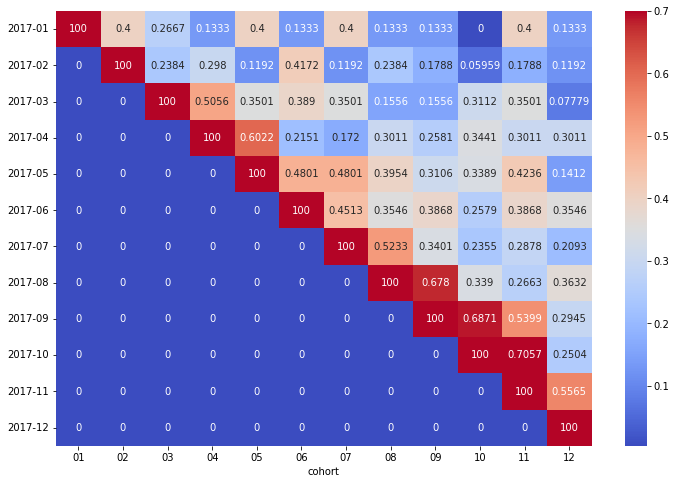

In [242]:
# попробуем построить heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cor, fmt ='.4g', annot=True, vmax=0.7, vmin=0.004, cmap= 'coolwarm')
# но стоит заметить, что тут расчеты ограничиваются 2017 годом, не учитывают для крайних месяцев следующие показатели в 2018г.!

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Построить RFM-сегментацию пользователей, чтобы качественно оценить аудиторию. В кластеризации выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [246]:
orders_customers_rfm = orders.merge(customers, how='left')

In [247]:
# мержджим ДФ
orders_customers_items_rfm = orders_customers_rfm.merge(items, on='order_id', how='left')
orders_customers_items_rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [248]:
# Оставляем только выполненные заказы
orders_customers_items_rfm = orders_customers_items_rfm.query('order_approved_at != "NaT" and order_status == "delivered"')

In [249]:
# Оставляем только нужные нам столбцы
orders_customers_items_rfm_df = orders_customers_items_rfm[['product_id', 'customer_unique_id','order_approved_at','price']]
orders_customers_items_rfm_df.head()

,product_id,customer_unique_id,order_approved_at,price
0,87285b34884572647811a353c7ac498a,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,29.99
1,595fac2a385ac33a80bd5114aec74eb8,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,118.70
2,aa4383b373c6aca5d8797843e5594415,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,159.90
3,d0b61bfb1de832b15ba9d266ca96e5b0,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,45.00
4,65266b2da20d04dbe00c5c2d3bb7859e,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,19.90


In [250]:
# Находим разницу между первым и последним днем покупки
delta = orders_customers_items_rfm_df.order_approved_at.max() - timedelta(days=1)

In [251]:
# Создадим таблицу RFM
RFM = orders_customers_items_rfm_df.groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': lambda x: (delta - x.max()).days, 'product_id': lambda x: len(x), 'price': lambda x: x.sum()}) \
    .rename(columns={'order_approved_at': 'R', 'product_id': 'F', 'price': 'M'})

In [254]:
RFM.head()

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,110,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,112,1,18.90
2,0000f46a3911fa3c0805444483337064,535,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,319,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,286,1,180.00


In [252]:
# Разобьем на 5 диапазонов до 20, 20-40, 40-60, 60-80 и выше 80 %
RFM_quan = RFM.quantile(q=[0.20, 0.40, 0.60, 0.80]).to_dict()
RFM_quan

{'R': {0.2: 90.0, 0.4: 175.0, 0.6: 266.0, 0.8: 379.1999999999971},
 'F': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'M': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

тут явно разная ситуация получается:
frequency по всем квантилям = 1 (распределение неравномерное), разделим следующим образом:

Сумма покупок = 1 - кто совершил покупку один раз 

Сумма покупок = 2 - кто сорежает покупку второй раз (повторяет свой опыт)

Сумма покупок = 3 - кто время от времени покупают что-то

Сумма покупок от 4 до 6 вкл. - активные пользователи магазина

Сумма покупок более 6 - оставшаиеся самые активные

по recency тоже стоит чуть подкорректировать рапределение включая здравый смысл. разделим на пять частей отталкиваясь от суммы дней в году:

Совершение покупки за последний месяц (от 0 до 30 дней вкл.)

Совершение покупки за последний квартал (от 31 до 120 дней вкл.)

Совершение покупки за последние полгода (от 121 до 180 дней вкл.)

Совершение покупки за последний год (от 181 до 365 дней вкл.)

Совершение покупки за последний год (более 365 дней)

у monetary достаточно адекватное распределение получилось, на мой взгляд

In [260]:
# функции для разбивки на группы подкорректировала соответсвенно:
def r_score(x):
    if x <= 30:
        return 5
    elif x <= 120:
        return 4
    elif x <= 180:
        return 3
    elif x <= 365:
        return 2
    else:
        return 1

def f_score(x, f):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x <= 6:
        return 4
    else:
        return 5
    
def m_score(x, m):
    if x <= RFM_quan[m][.2]:
        return 1
    elif x <= RFM_quan[m][.4]:
        return 2
    elif x <= RFM_quan[m][.6]:
        return 3
    elif x <= RFM_quan[m][.8]:
        return 4
    else:
        return 5

In [261]:
# Применяем ф-цию для каждой метрики
RFM['R_q'] = RFM['R'].apply(lambda x: r_score(x))
RFM['F_q'] = RFM['F'].apply(lambda x: f_score(x, 'F'))
RFM['M_q'] = RFM['M'].apply(lambda x: m_score(x, 'M'))

In [262]:
RFM['RFM_q'] = RFM.R_q.map(str) + RFM.F_q.map(str) + RFM.M_q.map(str)

In [264]:
RFM.head()

,customer_unique_id,R,F,M,R_q,F_q,M_q,RFM_q
0,0000366f3b9a7992bf8c76cfdf3221e2,110,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,112,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,535,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,319,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,286,1,180.00,2,1,5,215


In [272]:
# визуализиурем с помощью разбиения на группы по словарю:
segt_map = {
    r'[1-2][1-2]': 'спящие',
    r'[1-2][3-4]': 'в зоне риска',
    r'[1-2]5': 'можно потерять',
    r'3[1-2]': 'скоро заснут',
    r'33': 'нуждаются во внимании',
    r'[3-4][4-5]': 'постоянные клиенты',
    r'41': 'многообежающие',
    r'51': 'новые покупатели',
    r'[4-5][2-3]': 'потенциальные лидеры',
    r'5[4-5]': 'лидеры'
}

In [273]:
# добавим колонку с такими группами к ДФ
RFM['Segment'] = RFM['R_q'].map(str) + RFM['F_q'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head()

,customer_unique_id,R,F,M,R_q,F_q,M_q,RFM_q,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,110,1,129.90,4,1,4,414,многообежающие
1,0000b849f77a49e4a4ce2b2a4ca5be3f,112,1,18.90,4,1,1,411,многообежающие
2,0000f46a3911fa3c0805444483337064,535,1,69.00,1,1,2,112,спящие
3,0000f6ccb0745a6a4b88665a16c9f078,319,1,25.99,2,1,1,211,спящие
4,0004aac84e0df4da2b147fca70cf8255,286,1,180.00,2,1,5,215,спящие


<Figure size 1152x1152 with 0 Axes>

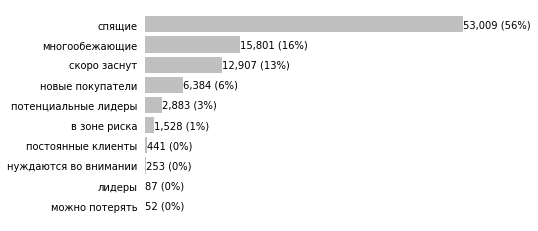

In [276]:
# визуал
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(16,16))
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers','potential loyalists']:
            bar.set_color('blue')
        if segments_counts.index[i] in ['at risk']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

# Выводы: 
как же много у нас спящих клиентов! это достаточно плохо в общем случае, но если это магазин с какими-то *редкими товарами*, то, очевидно, там будет именно такая ситуация, учитывая такой низкий ретеншен.

Постоянных клиентов мало, почти 50% от лояльных пользователей - это покупатели, которые перестали так часто покупать товары, по каким-то причинам (может быть из-за плохого подбора товаров, поехала система персонализированной рассылки и подбора товаров, рассылки с уникальными промокодами и скидками).

Этого стоило ожидать. Изначально при первых же попытках получить что-то удобоваримое из этих данных, мало что получалось, так как почти все они состоят из пользователей, которые совершили покупку всего один раз.